In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = '0.3'

In [2]:
def line(A, x1, y1, x2, y2):
    d = (y2 - y1) / (x2 - x1)
    for x in range(x1, x2 + 1):
        A[round(d * (x - x1) + y1), x] = 1

B = np.zeros((40, 40))
C = B.copy()
for i in range(1,20):
    B[round(0.5*i), i] = 1

C[[round(0.5*i) for i in range(1, 20)], [i for i in range(1, 20)]] = 1

A_ = np.array([[1 if j < 20 and i == 10 else 0 for j in range(20)] for i in range(20)])

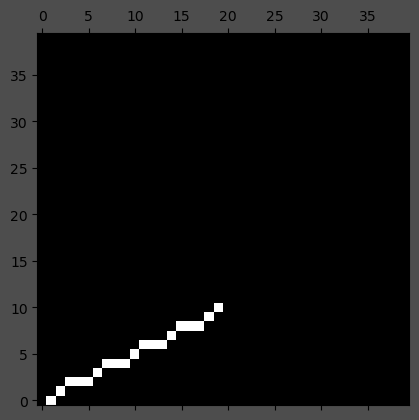

In [3]:
plt.matshow(C, cmap='gray', origin='lower')

In [4]:
def line_(arr, x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    err = dx / 2
    while True:
        arr[y1, x1] = 1
        if x1 == x2 and y1 == y2:
            break
        x1 += 1
        err -= dy
        if err < 0:
            y1 += 1
            err += dx

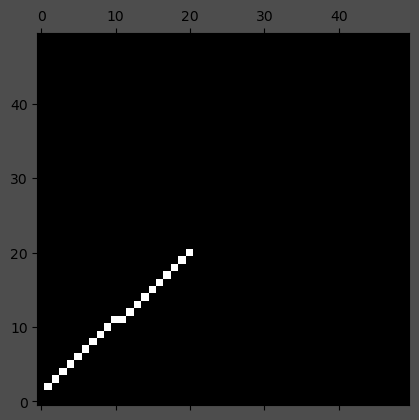

In [5]:
D = np.zeros((50,50))
line_(D, 1, 2, 20, 20)
plt.matshow(D, cmap='gray', origin='lower')

In [6]:
#Bresenham algorithm
def line__(arr, x1, y1, x2, y2):
    dx = abs(x2 - x1)
    sx = 1 if x1 < x2 else -1
    dy = -abs(y2 - y1)
    sy = 1 if y1 < y2 else -1
    err = dx + dy
    while True:
        arr[y1, x1] = 1
        if x1 == x2 and y1 == y2:
            break
        e2 = 2 * err
        if (e2 > dy):
            err += dy
            x1 += sx
        if (e2 < dx):
            err += dx
            y1 += sy

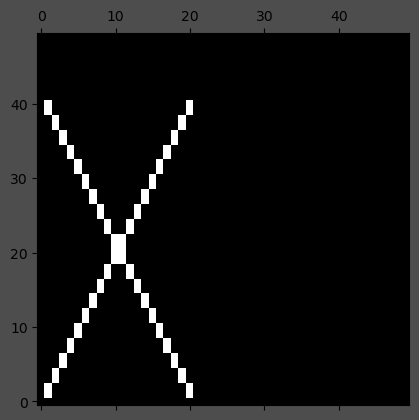

In [7]:
E = np.zeros((50,50))
line__(E, 1, 1, 20, 40)
line__(E, 1, 40, 20, 1)
plt.matshow(E, cmap='gray', origin='lower')

In [8]:
def rectangle(arr, a, b, c):
    d = (c[0] + a[0] - b[0], c[1] + a[1] - b[1])
    line__(arr, *a, *b)
    line__(arr, *b, *c)
    line__(arr, *c, *d)
    line__(arr, *d, *a)

In [9]:
L3 = np.zeros((25,25))
rectangle(L3, (6,2), (21,10), (17,18))

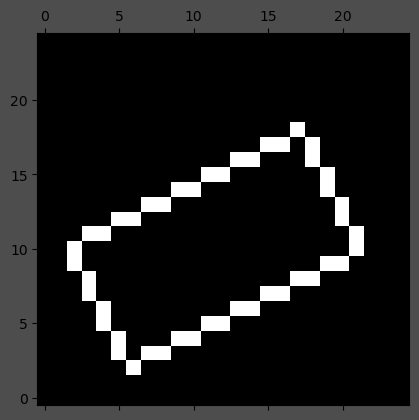

In [10]:
plt.matshow(L3, cmap='gray', origin='lower')

In [11]:
originRotM = lambda angle: np.array([[np.cos(angle), -np.sin(angle), 0],
                                     [np.sin(angle),  np.cos(angle), 0],
                                     [0, 0, 1]])


translationM = lambda vx, vy: np.array([[1, 0, vx],
                                        [0, 1, vy],
                                        [0, 0, 1]])


rotateM = lambda cX, cY, angle: ((translationM(cX, cY) @ originRotM(angle)) @ translationM(-cX, -cY))

originScaleM = lambda scaleX, scaleY: np.array([[scaleX, 0, 0],
                                                [0, scaleY, 0],
                                                [0, 0, 1]])


def scaleM(centerX, centerY, scaleX, scaleY=None):
    if scaleY == None:
        scaleY = scaleX
    return ((translationM(cX, cY) @ originscaleM(scaleX, scaleY)) @ translationM(-cX, -cY))

In [12]:
rotateM(3, 4, np.pi/4)

array([[ 0.70710678, -0.70710678,  3.70710678],
       [ 0.70710678,  0.70710678, -0.94974747],
       [ 0.        ,  0.        ,  1.        ]])

In [13]:
transformation = lambda M: lambda vec: np.round(M @ [*vec, 1]).astype('int')[:2]

In [14]:
transformation(np.array([[1,0,0],[0,1,0],[0,0,1]]))([10,5])

array([10,  5])

In [15]:
f = transformation(np.array([[1,0,0],[0,1,0],[0,0,1]]))
f([10, 5])

array([10,  5])

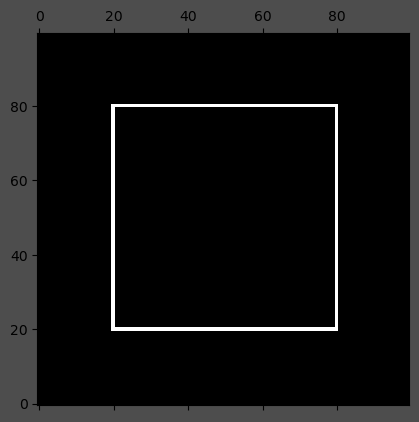

In [16]:
L4 = np.full((100,100), 0, 'int')
rect = [(20,20), (80,20), (80,80)]
rectangle(L4, *rect)
plt.matshow(L4, cmap='gray', origin='lower')

In [17]:
rectangle(L4, *list(map(transformation(rotateM(50, 50, np.pi/6)), rect)))

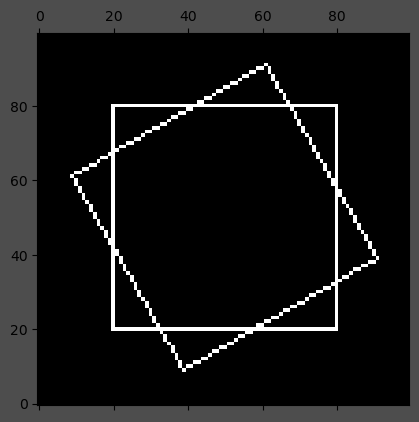

In [18]:
plt.matshow(L4, cmap='gray', origin='lower')

In [20]:
import images2gif

ImportError: cannot import name 'readGif' from partially initialized module 'images2gif' (most likely due to a circular import) (C:\Users\jensm\anaconda3\lib\site-packages\images2gif\__init__.py)

In [ ]:
def throw(ex): raise ex
(lambda: throw(Exception('ERROR')))()

In [ ]:
import dis

In [ ]:
def add2(x, y): return (x + y + 3) * 5
add = lambda x, y, z = 3: x + y + z

In [ ]:
dis.dis(add)

In [ ]:
dis.dis(add2)